# Assessment of Blood Biomarker Importance using Dimensionality Reduction and Machine Learning  

By Julian Dallmeier 

**Contact ddallmeier@gmail.com for questions**

### Import Packages

In [1]:
# Import useful packages for data manipulation
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tkinter as tk
from tkinter import filedialog
from scipy.interpolate import interp1d
from scipy import interpolate
from pandas.plotting import scatter_matrix

### Preprocessing

In [2]:
# Load FIRST .csv file that was saved as "raw_data"
raw_data = pd.read_csv('Wang_maggio_data.csv', sep=';')

# Rename columns to desired column names
raw_data.columns = ['index','subject','gender','target','time','IgM_GAD1','IgM_GAD2','IgM_MOG','IgM_NF','IgG_GAD1','IgG_GAD2','IgG_MOG','IgG_NF']

# Set inclusion parameters
final_week_all = raw_data.loc[(raw_data['time'] > 4)]

### Visualize Data - Heatmap

In [3]:
# Visualize the data
heatmap = final_week_all
heatmap = heatmap.drop(columns= ['index','time','target'])
heatmap.style.background_gradient(cmap='summer')

,subject,gender,IgM_GAD1,IgM_GAD2,IgM_MOG,IgM_NF,IgG_GAD1,IgG_GAD2,IgG_MOG,IgG_NF
17,gv_17_317,female,1.200000,0.811000,0.290000,1.542000,0.151000,0.223000,0.070000,0.307000
18,gv_17_318,female,0.350000,0.582000,0.149000,0.901000,0.129000,0.190000,0.057000,0.108000
19,gv_17_319,female,0.900000,0.590000,0.069000,1.521000,0.140000,0.234000,0.061000,0.100000
20,gv_17_320,female,0.813000,0.697000,0.071000,1.559000,0.589000,0.506000,0.078000,0.283000
21,gv_17_321,female,0.528000,0.495000,0.181000,0.993000,0.162000,0.221000,0.045000,0.124000
22,gv_17_334,female,0.744000,0.626000,0.357000,1.110000,0.237000,0.232000,0.069000,0.138000
23,gv_17_335,female,0.959000,1.262000,0.819000,1.441000,0.197000,0.246000,0.070000,0.129000
24,gv_17_336,female,0.454000,0.563000,0.242000,1.241000,0.156000,0.273000,0.086000,0.123000
25,gv_17_337,female,0.594000,0.598000,1.396000,0.734000,0.188000,0.280000,0.086000,0.759000
26,gv_17_338,female,0.546000,0.829000,1.471000,0.931000,0.163000,0.240000,0.042000,0.466000


### Visualize Data - Scatter Matrix

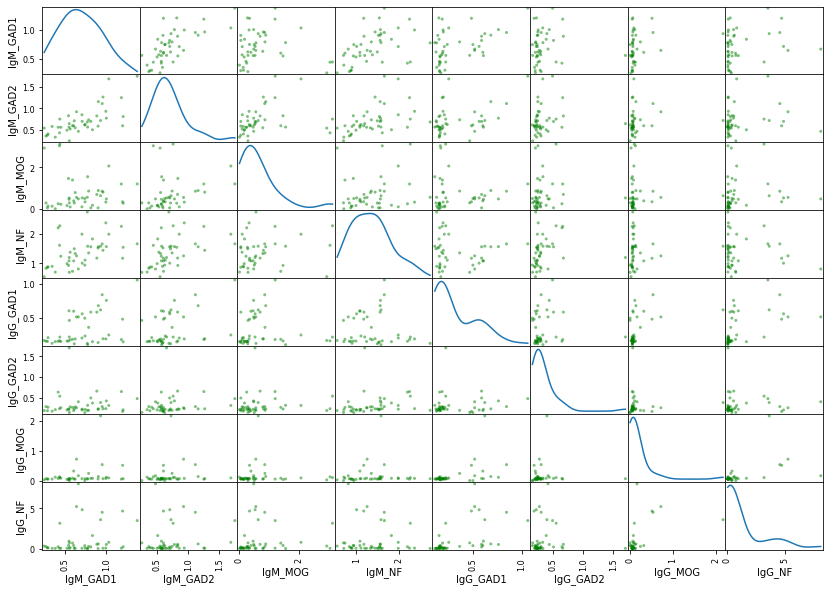

In [4]:
# producing a scatter matrix for each pair of features in the data
datavis = final_week_all.drop(columns=['index','time'])
pd.plotting.scatter_matrix(datavis, alpha = 0.5, figsize = (14,10), diagonal='kde', color = 'g');
plt.show()

### More Preprocessing

In [5]:
# Reset index and drop null valeus
dfanswers = final_week_all.drop(columns=['index','gender','time'])
df = final_week_all.drop(columns=['index','subject','gender','time'])
df = df.dropna()
df = df.reset_index()
df = df.drop(columns=['index'])
dfempty = df.drop(columns=['target'])
dfanswers = dfanswers.dropna()
dfanswers = dfanswers.reset_index()

### Selection of PCA features

In [6]:
# use ALL features
features = ['IgM_GAD1','IgM_GAD2','IgM_NF','IgG_GAD1','IgG_MOG','IgG_NF', 'IgM_MOG','IgG_GAD2']
dfempty = df.drop(columns=['target'])

In [7]:
# Scale the data using a standardscalar
from sklearn.preprocessing import StandardScaler
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

### Apply the PCA to the chosen components

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

# Print explained variance of PCA
print(pca.explained_variance_ratio_)

[0.30438816 0.22255577]


In [9]:
# Recombine axis to display targets
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

In [10]:
sham_STD = finalDf.loc[(finalDf['target'] == 'sham')]
sham_STD.columns = ['PC1','PC2','injury']
sham_pc1_std = sham_STD.PC1.std
sham_pc2_std = sham_STD.PC2.std

pc1 = 0.730981 * 3
pc2 = 1.073195 * 3

pc1 = pc1 *2
pc2 = pc2 *2
print(pc1)
print(pc2)

4.385886
6.439169999999999


### Plot feature importance 

C:\Users\jdd158\AppData\Local\Temp/ipykernel_11444/706902808.py:6: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


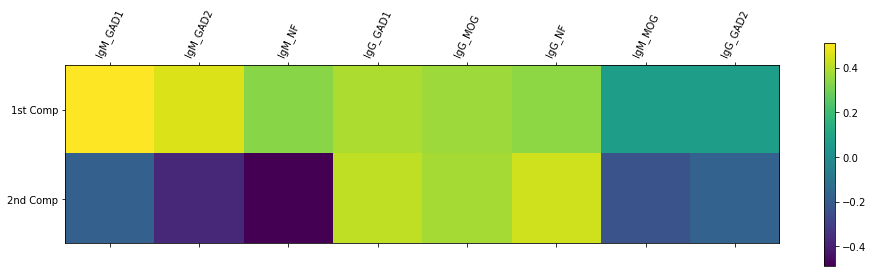

[[ 0.51201092  0.45886647  0.3348057   0.39050682  0.3673019   0.34416999
   0.06805842  0.06855896]
 [-0.17936389 -0.3707065  -0.48704006  0.41639638  0.37721331  0.44019858
  -0.23174341 -0.17332525]]


In [11]:
# Plot feature importance
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1],['1st Comp','2nd Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(features)),features,rotation=65)
plt.tight_layout()
plt.show()
print(pca.components_)

In [12]:
# Check for Outliers
outliers = finalDf.loc[(finalDf['principal component 1'] > 0.9)]
outliers

,principal component 1,principal component 2,target
6,1.028528,-1.530185,sham
13,1.130046,-1.857859,smTBI
25,2.091009,-2.881414,ssTBI
28,2.621749,-2.761183,ssTBI
31,1.937755,-0.282132,ssTBI
34,3.527849,1.365206,ssTBI
35,1.017125,3.069900,ssTBI
36,1.631790,0.251312,ssTBI
38,2.008105,2.036807,ssTBI
39,2.096964,1.850348,ssTBI


### Plot scatter plot of the principle components with the directionality of each component

<AxesSubplot:title={'center':'PC plane with original feature projections.'}, xlabel='Dimension 1', ylabel='Dimension 2'>

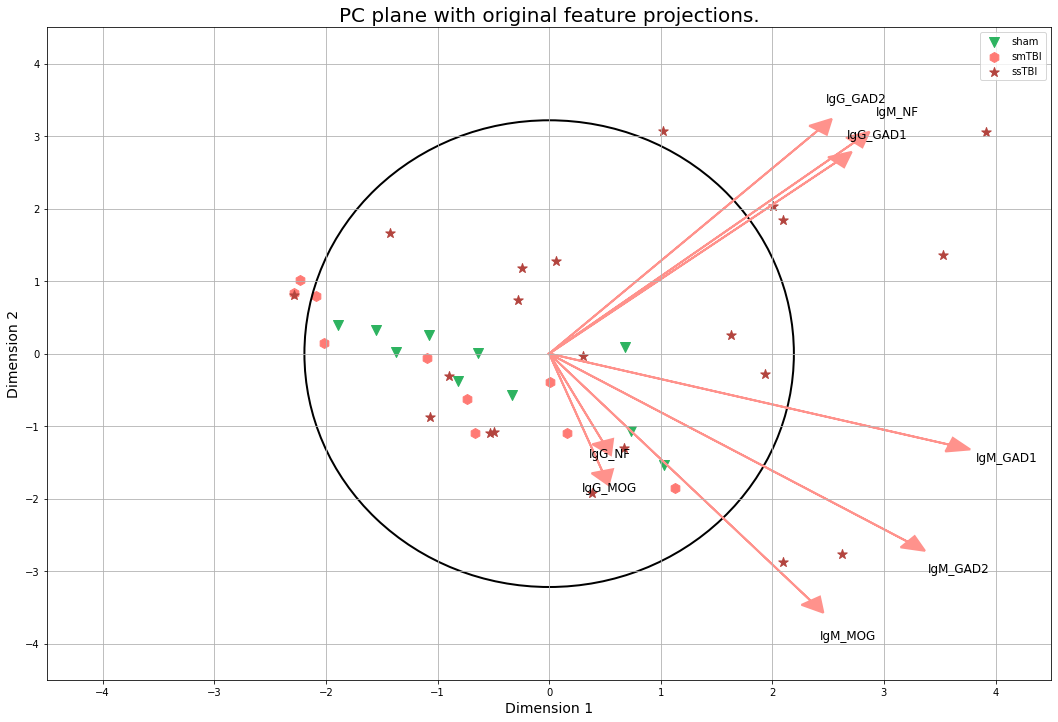

In [13]:
from matplotlib.patches import Ellipse
def biplot(data, reduced_data, pca):
    
    fig, ax = plt.subplots(figsize = (18,12))
#     ax = fig.add_subplot(1,1,1) 
    
    
    targets = ['sham', 'smTBI', 'ssTBI']
    colors = ['#2DB360', '#FF7A74', '#B3443E']
    markers = ['v','h','*']
    for target, color, marker in zip(targets,colors,markers):
        indicesToKeep = data['target'] == target
        ax.scatter(data.loc[indicesToKeep, 'principal component 1']
               , data.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 100, marker = marker)
    ax.legend(targets)
    
    # scatterplot of the reduced data 
#   ax.scatter(x=reduced_data.loc[:, 'principal component 1'], y=reduced_data.loc[:, 'principal component 2'], s=70, alpha=0.5)
    feature_vectors = pca.components_.T
    
    
    #Oval 
    ellipse = Ellipse(xy=(0,0), width=4.385886, height=6.43916999, 
                        edgecolor='k', fc='None', lw=2)
    ax.add_patch(ellipse)
    
    
    # using scaling factors to make the arrows
    arrow_size, text_pos = 7.0, 8.0,

    # projections of the original features
    for i, v in enumerate(feature_vectors):
        ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], head_width=0.2, head_length=0.2, linewidth=2, color='#FF928C')
        ax.text(v[0]*text_pos, v[1]*text_pos, dfempty.columns[i], color='black', ha='center', va='center', fontsize=12)

    ax.set_xlabel("Dimension 1", fontsize=14)
    ax.set_ylabel("Dimension 2", fontsize=14)
    ax.set_title("PC plane with original feature projections.", fontsize=20);
    
    #Set axis
    ax.set_xlim([-4.5, 4.5])
    ax.set_ylim([-4.5, 4.5])
    ax.grid()

    return ax

biplot(finalDf, principalDf, pca)


### Unsupervised Learning with K-Means Clustering

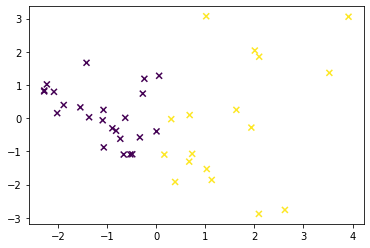

In [14]:
from sklearn.cluster import KMeans
principalDf.columns = ['PC1','PC2']
model = KMeans(n_clusters=2)
model.fit(principalDf)

labels = model.predict(principalDf)

x = principalDf.PC1
y = principalDf.PC2

plt.scatter(x, y, c=labels,marker="x")
plt.show()

### Supervised Learning - Using blood biomarker levels to predice case/control

In [15]:
from sklearn.model_selection import train_test_split

datavis = datavis.dropna()
X = datavis[['IgM_GAD1', 'IgM_GAD2', 'IgM_MOG','IgM_NF','IgG_GAD1','IgG_GAD2','IgG_MOG','IgG_NF']]
y = datavis['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=None)

### KNN Classifier

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.5454545454545454

### Support Vector Machine

In [17]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(X_train,y_train)

model.score(X_test, y_test)

0.5454545454545454

### Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100,max_depth=2)
rfc.fit(X_train,y_train)

rfc.score(X_test, y_test)

0.5454545454545454

In [19]:
## TODO
## MAKE BINARY TARGET
## ADD ROC CURVE COMPARISON GRAPH 

# from sklearn.metrics import plot_roc_curve
# fig, ax = plt.subplots(figsize=(12,12))
# knn_disp = plot_roc_curve(rfc, X_test, y_test, ax=ax)

### Plot Feature Importances

In [20]:
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
IgM_MOG,0.286603
IgG_GAD1,0.172896
IgG_NF,0.114464
IgM_GAD1,0.108620
IgG_MOG,0.092928
IgM_GAD2,0.091294
IgG_GAD2,0.082948
IgM_NF,0.050246


<AxesSubplot:>

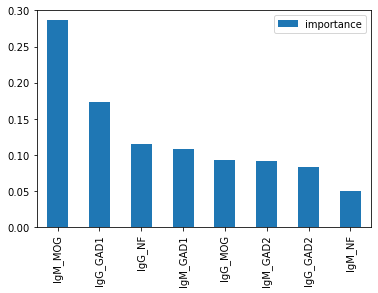

In [21]:
feature_importances.plot(kind = 'bar')